<a href="https://colab.research.google.com/github/rohit161827/Rohit/blob/main/Copy_of_House_price_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Import the required libraries

In [ ]:
import numpy as np #Linear algebra Library
import pandas as pd 
import matplotlib.pyplot as plt #to plot graphs
import seaborn as sns #to plot graphs
from sklearn.linear_model import LinearRegression #for linear regression model
sns.set() #setting seaborn as default 
import warnings
warnings.filterwarnings('ignore')

2.Read the input data

In [ ]:
data=pd.read_csv('/content/Housing.csv') #reads the input data
data.head() #displays the first five rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


3.Understand your data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe(include ='all') #parameter include=all will display NaN values as well

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


4.Check for NULL values

In [ ]:
data.isnull().sum() # No null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

5. Data Preparation

a) YES/NO categories:

  It is seen that there are some columns with categorical values like 'YES' or 'NO'. We need to change them to 0 and 1

In [ ]:

#first fetch all the categorical columns with Yes and NO
categorical =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
# now replace yes and no with 1 and 0 in our dataset
data[categorical] = data[categorical].apply(binary_map)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


b) Dummy variable:

Now the last column(furnishingstatus) has 3 categories i.e. furnished,semi-furnished and unfurnished. We need to convert this to numbers as well

In [ ]:
table = pd.get_dummies(data['furnishingstatus'])   #add the column into table variable
table.head() #add the column into table variable

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
table = pd.get_dummies(data['furnishingstatus'], drop_first = True)  #recreate table but now drop the first column(furnished)
table.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
data = pd.concat([data, table], axis = 1) #attach the other two columns to our data set #attach the other two columns to our data set
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
data.drop(['furnishingstatus'], axis = 1, inplace = True) #drop the old column from the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


6.Split data into Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0) #so data can have same values
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [ ]:

# only output price is poped out of df_Train and put into y_train
y_train = df_train.pop('price') 
x_train = df_train

In [ ]:
y_train.head()

359    3710000
19     8855000
159    5460000
35     8080940
28     8400000
Name: price, dtype: int64

In [ ]:

#using linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([ 2.38504390e+02,  1.07956765e+05,  1.10200392e+06,  4.17785179e+05,
        5.82598595e+05,  3.51446413e+05,  2.49420884e+05,  9.80170780e+05,
        7.72474782e+05,  2.33831038e+05,  6.86391973e+05,  1.06320155e+04,
       -3.58114788e+05])

7.Run model using test data

In [ ]:
y_test = df_test.pop('price')
x_test = df_test

In [ ]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
lm.score(x_train,y_train)

0.6814893088451202

In [ ]:

#predict the output(predictions) using the test data
predictions = lm.predict(x_test)

In [ ]:

#AttributeError: 'Series' object has no attribute 'flatten' --to avoid this error in the next step
y_test.shape
y_test_matrix = y_test.values.reshape(-1,1)

In [ ]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'actual':y_test_matrix.flatten(),'Predicted':predictions.flatten()}) 
#flatten toget single axis of data (1 dimension only)

In [ ]:
dframe.head(15)

,actual,Predicted
0,4403000,4.143699e+06
1,7350000,6.661197e+06
2,5250000,5.722054e+06
3,4550000,5.326517e+06
4,4382000,4.831443e+06
5,4690000,4.069360e+06
6,8540000,8.056958e+06
7,5250000,5.730070e+06
8,2730000,3.497756e+06
9,5950000,5.656737e+06


In [ ]:
dframe=pd.DataFrame({'actual':y_test_matrix.flatten(),'Predicted':predictions.flatten()})

8.plot graph

Text(0, 0.5, 'Predicted')

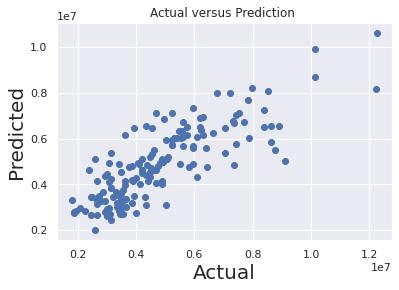

In [ ]:

#using scatter plot compare the actual and predicted data
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)

Text(0, 0.5, 'Predicted')

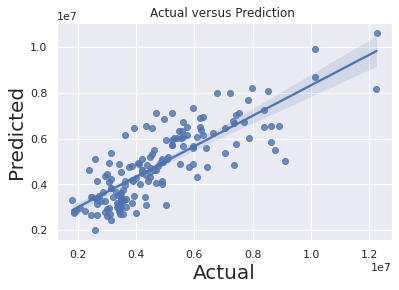

In [ ]:

#trying the same with a reg plot(optonal)
sns.regplot(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)